# Python - Data Viz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas
%matplotlib inline

## Read cleaned data

In [2]:
df = pd.read_pickle('/dsa/groups/casestudy2022su/team05/carscom_v03.pkl')
df.head(30)

,Year,Make,Model,Dealer_Name,Distance Radius,Zip,State,City,Mileage,Price,...,Avg_Mileage,Min_Mileage,Max_Mileage,Count,price_diff,mileage_diff,YoY_price_pct_change,YoY_mileage_pct_change,Lat,Lon
0,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,2673,-9317,8,-24,32.716,-117.161
1,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,30134,37990,...,29486.888889,4661,68184,90,2673,-9317,8,-24,32.716,-117.161
2,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,2673,-9317,8,-24,32.716,-117.161
3,2020,Jeep,Grand Cherokee Laredo,Carl Burger's Dodge Chrysler Jeep RAM,50,92132,CA,San Diego,4661,38990,...,29486.888889,4661,68184,90,2673,-9317,8,-24,32.716,-117.161
4,2020,Jeep,Grand Cherokee Laredo,San Diego Chrysler Dodge Jeep RAM,50,92132,CA,San Diego,21909,31388,...,29486.888889,4661,68184,90,2673,-9317,8,-24,32.716,-117.161
5,2016,Dodge,Challenger SRT Hellcat,TRED Private Seller (San Diego),50,92132,CA,San Diego,29635,54099,...,43169.411765,6008,71456,51,-1154,12896,-2,42,32.716,-117.161
6,2016,Dodge,Challenger SRT Hellcat,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,62595,50990,...,43169.411765,6008,71456,51,-1154,12896,-2,42,32.716,-117.161
7,2010,Lexus,ES 350,TRED Private Seller (San Diego),50,92132,CA,San Diego,159000,8909,...,76505.054545,36016,216862,55,0,0,0,0,32.716,-117.161
8,2010,Lexus,ES 350,Carvana-Touchless Delivery To Your Home,50,92132,CA,San Diego,64663,18990,...,76505.054545,36016,216862,55,0,0,0,0,32.716,-117.161
9,2020,Buick,Encore Essence,Hertz Car Sales San Diego,50,92132,CA,San Diego,57751,21353,...,51223.333333,12868,70829,96,-1314,13718,-5,36,32.716,-117.161


## Count the number of vehicles in each city 

In [3]:
city_num = pd.DataFrame(df['City'].value_counts()).reset_index()
city_num.rename(columns={"index": "City", "City": "Num"}, inplace = True)
city_num

,City,Num
0,Portland,35632
1,Charleston,9986
2,Providence,9592
3,Bridgeport,9592
4,Burlington,9592
5,Boston,9591
6,Dallas,9151
7,Birmingham,9126
8,Raleigh,9094
9,Los Angeles,9082


## Import the location of each city

In [4]:
city = pd.read_csv('/dsa/groups/casestudy2022su/team05/city.csv')
city = city.drop(columns = 'Unnamed: 0')
city

,City,Lat,Lon
0,San Diego,32.716,-117.161
1,Los Angeles,34.052,-118.244
2,San Francisco,37.775,-122.419
3,Portland,45.515,-122.678
4,Seatle,47.606,-122.332
5,Ketchum/Boise,43.681,-114.364
6,Billings Bozeman,45.680,-111.039
7,Las Vegas,36.172,-115.139
8,Phoenix,33.448,-112.074
9,Salt Lake City,40.761,-111.891


## Combine the vehicle number and city location

In [5]:
vehicle_num = pd.merge(city_num, city, how='inner', on = 'City')
vehicle_num['Percent'] = vehicle_num.Num/100
vehicle_num

,City,Num,Lat,Lon,Percent
0,Portland,35632,45.515,-122.678,356.32
1,Portland,35632,43.659,-70.257,356.32
2,Charleston,9986,32.777,-79.931,99.86
3,Charleston,9986,32.777,-79.931,99.86
4,Providence,9592,41.824,-71.413,95.92
5,Bridgeport,9592,41.179,-73.189,95.92
6,Burlington,9592,44.476,-73.212,95.92
7,Boston,9591,42.360,-71.059,95.91
8,Dallas,9151,32.777,-96.797,91.51
9,Birmingham,9126,33.519,-86.810,91.26


## Plot the geospatial map

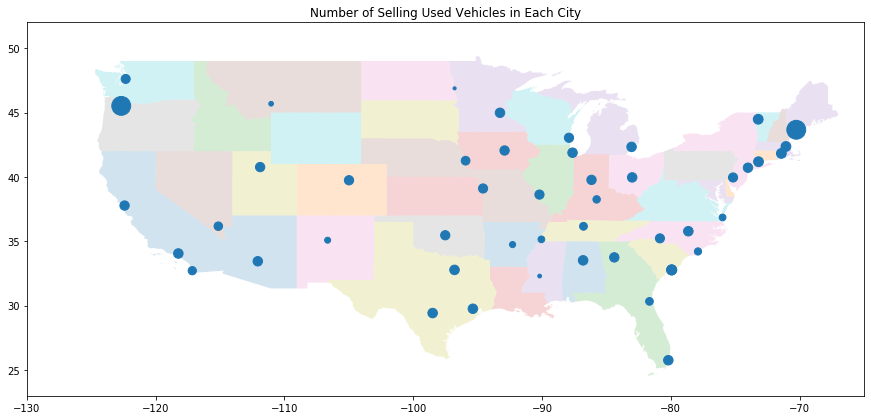

In [6]:
state = geopandas.read_file("/dsa/groups/casestudy2022su/team05/US_state/cb_2018_us_state_500k.shp")
state.plot(column = 'NAME', alpha = 0.2, figsize=(15, 15))

plt.scatter(data=vehicle_num, x='Lon', y='Lat', s='Percent')
plt.title('Number of Selling Used Vehicles in Each City')

plt.xlim(-130, -65)
plt.ylim(23, 52)
#plt.savefig('Number of Selling Used Vehicles in Each City.jpg')

plt.show()

## Pick some makes and models as template

In [7]:
Car = df[['City', 'Lat', 'Lon', 'Avg_Price', 'Make', 'Model']]
Jeep = Car[Car['Make'] == 'Jeep']
Ford = Car[Car['Make'] == 'Ford']

Jeep_Compass = Jeep[Jeep['Model'] == 'Compass ']
Jeep_Compass = Jeep_Compass.drop_duplicates()
Jeep_Compass['Percent'] = Jeep_Compass.Avg_Price/100 # Conver this value into percent to modify the visualization

Jeep_Grand_Cherokee = Jeep[Jeep['Model'] == 'Grand Cherokee ']
Jeep_Grand_Cherokee = Jeep_Grand_Cherokee.drop_duplicates()
Jeep_Grand_Cherokee['Percent'] = Jeep_Grand_Cherokee.Avg_Price/100 # Conver this value into percent to modify the visualization

Ford_F150 = Ford[Ford['Model'] == 'F-150 ']
Ford_F150 = Ford_F150.drop_duplicates()
Ford_F150['Percent'] = Ford_F150.Avg_Price/100 # Conver this value into percent to modify the visualization

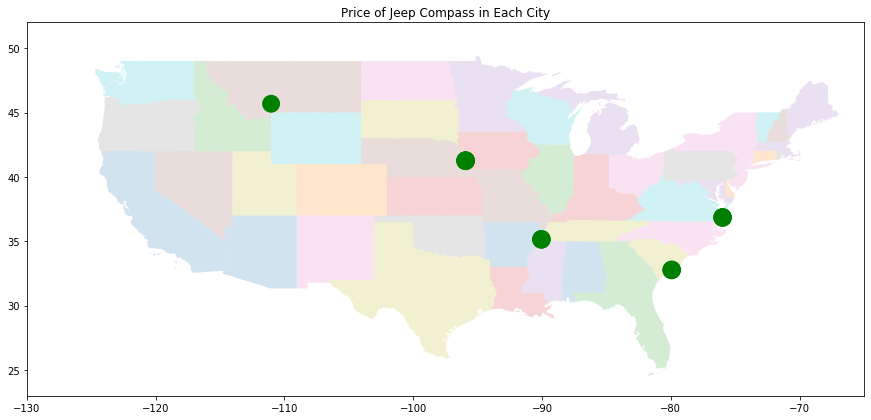

In [8]:
state.plot(column = 'NAME', alpha = 0.2, figsize=(15, 15))

plt.scatter(Jeep_Compass.Lon, Jeep_Compass.Lat, c = 'g', s = Jeep_Compass.Percent)
plt.title('Price of Jeep Compass in Each City')

plt.xlim(-130, -65)
plt.ylim(23, 52)
#plt.savefig('Price of Jeep Compass in Each City.jpg')

plt.show()

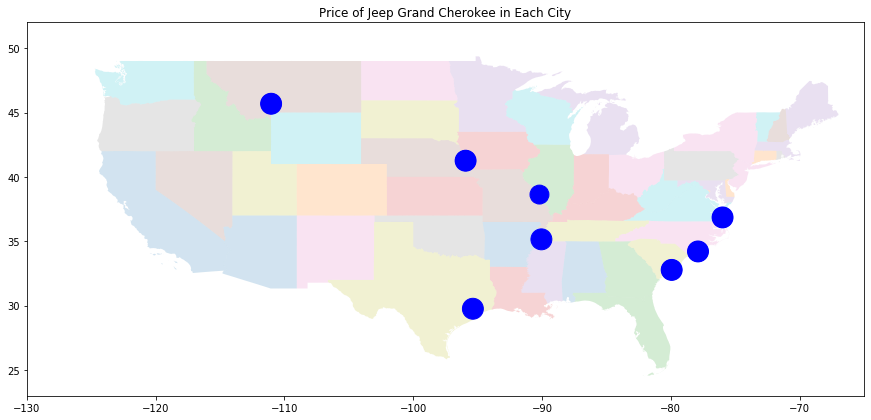

In [9]:
state.plot(column = 'NAME', alpha = 0.2, figsize=(15, 15))

plt.scatter(Jeep_Grand_Cherokee.Lon, Jeep_Grand_Cherokee.Lat, c = 'b', s = Jeep_Grand_Cherokee.Percent)
plt.title('Price of Jeep Grand Cherokee in Each City')

plt.xlim(-130, -65)
plt.ylim(23, 52)
#plt.savefig('Price of Jeep Grand Cherokee in Each City.jpg')

plt.show()

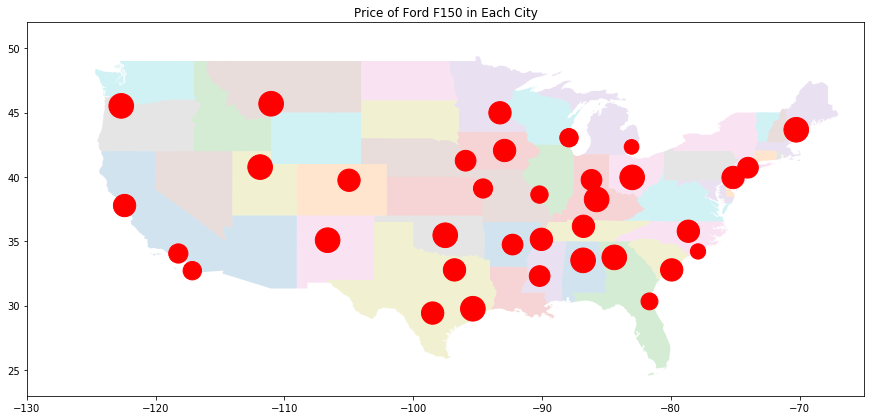

In [10]:
state.plot(column = 'NAME', alpha = 0.2, figsize=(15, 15))

plt.scatter(Ford_F150.Lon, Ford_F150.Lat, c = 'r', s = Ford_F150.Percent)
plt.title('Price of Ford F150 in Each City')

plt.xlim(-130, -65)
plt.ylim(23, 52)
#plt.savefig('Price of Ford F150 in Each City.jpg')

plt.show()